Bu projede 'imdb_top_1000' dosyası kullanılmıştır. Gerekli kütüphaneler yardımıyla dosya yüklenerek veriseti incelemesi yapılmıştır. Eksik olan bazı verilerde gerekli işlemler yapılarak eksik datalar doldurularak veri analizine hazır hale getirilmiştir. IMDB_Rating e etkili olan  Yönetmenler, Oyuncular, Film türleri, Çıkış yılları, Meta Puanları, Hasılatları gibi faktörlerle incelemeler yapılarak aralarında ilişki kurulmaya çalışılmıştır. Belirli gruplandırma, görselleştirmelerle gözlemlenmiştir.

In [1]:
#Gerekli kütüphaneler yüklendi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Veri seti yüklendi
data=pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)

In [4]:
data.shape

(1000, 16)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.949300e+00,2.754912e-01,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,7.797153e+01,1.237610e+01,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,2.736929e+05,3.273727e+05,25088.0,55526.25,138548.5,374161.25,2343110.0
Gross,831.0,6.803475e+07,1.097500e+08,1305.0,3253559.00,23530892.0,80750893.50,936662225.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [7]:
#Kaç tane NaN değerler olduğuna bakılmıştır
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
#Certificate, bir yapıtın hangi yaş gruplarına uygun olduğunu ve hangi tür içeriklere sahip olduğunu belirlemek için kullanılır
#Certificate sütununda ki benzersiz(unique) değerlere bakılır
data['Certificate'].unique()


array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [9]:
#'A': Hindistan'da kullanılan bir sertifika değeri olup, tüm yaş gruplarına uygun olan yapıtları temsil eder.
#'UA veya 'U/A': Hindistan'da kullanılan bir sertifika değeri olup, 12 yaş ve üzeri izleyicilere uygun olan yapıtları temsil eder.
#'U' : genel izleyici kitlesine yönelik olan yapıtları temsil eder
#'PG-13': ABD'de kullanılan bir sertifika değeri olup, 13 yaş ve üzeri izleyicilere yönelik olan yapıtları temsil eder.
#'R': ABD'de kullanılan bir sertifika değeri olup, 17 yaş ve üzeri izleyicilere yönelik olan yapıtları temsil eder.
#'PG': Genel izleyici kitlesine yönelik olan yapıtları temsil eder, ancak bazı sahneler veya içerikler çocukları rahatsız edebilir ve ebeveyn rehberliği önerilebilir.
#'G': Genel izleyici kitlesine yönelik olan yapıtları temsil eder. 
#'Passed" sertifikası, sıkı ahlaki ve sansür kurallarının geçerli olduğu dönemde kullanılan bir ifadedir ve günümüzde genellikle terk edilmiştir.
#'TV-14': Amerikan televizyonunda kullanılan bir sertifika değeri olup, 14 yaş ve üzeri izleyicilere yönelik olan yapıtları temsil eder.
#'16' : 16 yaş ve üzeri izleyicilere yönelik olduğunu gösterir
#'TV-MA': Amerikan televizyonunda kullanılan bir sertifika değeri olup, yetişkinlere yönelik olan yapıtları temsil eder
#'Unrated': Bu ifade, bir yapıtın resmi bir sertifikaya sahip olmadığını veya bir sertifikaya tabi tutulmadığını gösterir.
#'GP': Bu ifade, Amerika Birleşik Devletleri'nde 1970'lerde kullanılan bir sertifika değeridir. Genel izleyici kitlesine yönelik olan yapıtları temsil eder. 
#Ancak küçük çocuklar için ebeveyn rehberliği önerilebilir. Daha sonra GP sertifikası yerini "PG" sertifikasına bırakmıştır.
#'Approved': Bu ifade, Amerikan Film Prodüksiyon Şirketleri Derneği tarafından kullanılan bir sertifika değeridir. Bir film veya yapımın dernek tarafından onaylandığını ve genel izleyici kitlesine uygun olduğunu gösterir.
#"TV-PG" sertifikası, Amerikan televizyonunda kullanılan bir sertifika değeridir. "Televizyon için Ebeveyn Rehberliği Önerilir" anlamına gelir.Genellikle 7 yaş ve üzeri izleyicilere yöneliktir.

In [10]:
#Meta puanı, film eleştirmenlerinin ve eleştiri sitelerinin incelemelerini derleyen ve bir filmin genel eleştirel başarısını yansıtan bir puanlama sistemidir.
#No_of_Votes , ilgili filmin IMDB platformunda aldığı toplam oy sayısını gösterir.
#Gross,  bir filmin gişe hasılatını temsil eder.

In [11]:
#'UA' ve 'U/A' aynı bilgileri içermektedir. 'Certificate' sütununda bulunan değerlerdeki 'U/A' değerleri 'UA' ile değiştirilmiştir.
data['Certificate'] = data['Certificate'].replace('U/A', 'UA')

In [12]:
#'A','Approved','U' değerleri 'G' ile aynı bilgileri içerir. Hepsi genel izleyici kitlesine uygun olduğunu gösterir. 'Certificate' sütununda bulunan bu değerler 'G' ile değiştirilmiştir.

data['Certificate'] = data['Certificate'].replace(['A', 'Approved', 'U'], 'G')

In [13]:
#'GP', 'TV-PG', 'PG' aynı bilgileri içerir. ikisi de genel izleyici yapısına uygun olup ancak küçük çocuklar için ebeveyn rehberliği önermektedir.
# 'Certificate' sütununda bulunan bu değerler 'PG' ile değiştirilmiştir.

data['Certificate'] = data['Certificate'].replace(['GP', 'TV-PG'], 'PG')

In [14]:
data['Certificate'].unique()

array(['G', 'UA', 'PG-13', 'R', nan, 'PG', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated'], dtype=object)

In [15]:
data[data['Certificate'].isna()].sort_values(by='Released_Year',ascending=True)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
321,https://m.media-amazon.com/images/M/MV5BNWJiNG...,Das Cabinet des Dr. Caligari,1920,NaN,76 min,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN
568,https://m.media-amazon.com/images/M/MV5BMTAxYj...,Nosferatu,1922,NaN,94 min,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,NaN
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75 min,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,50970.0
126,https://m.media-amazon.com/images/M/MV5BMTg5YW...,Metropolis,1927,NaN,153 min,"Drama, Sci-Fi",8.3,In a futuristic city sharply divided between t...,98.0,Fritz Lang,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,159992,1236166.0
567,https://m.media-amazon.com/images/M/MV5BMjMyYj...,Freaks,1932,NaN,64 min,"Drama, Horror",7.9,A circus' beautiful trapeze artist agrees to m...,80.0,Tod Browning,Wallace Ford,Leila Hyams,Olga Baclanova,Roscoe Ates,42117,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,https://m.media-amazon.com/images/M/MV5BMTYwMz...,Beasts of No Nation,2015,NaN,137 min,"Drama, War",7.7,"A drama based on the experiences of Agu, a chi...",79.0,Cary Joji Fukunaga,Abraham Attah,Emmanuel Affadzi,Ricky Adelayitor,Andrew Adote,73964,83861.0
574,https://m.media-amazon.com/images/M/MV5BNDQzZm...,Perfetti sconosciuti,2016,NaN,96 min,"Comedy, Drama",7.8,Seven long-time friends get together for a din...,NaN,Paolo Genovese,Giuseppe Battiston,Anna Foglietta,Marco Giallini,Edoardo Leo,57168,NaN
54,https://m.media-amazon.com/images/M/MV5BNWJhMD...,Ayla: The Daughter of War,2017,NaN,125 min,"Biography, Drama, History",8.4,"In 1950, amid-st the ravages of the Korean War...",NaN,Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee,34112,NaN
721,https://m.media-amazon.com/images/M/MV5BNjRhYz...,God's Own Country,2017,NaN,104 min,"Drama, Romance",7.7,Spring. Yorkshire. Young farmer Johnny Saxby n...,85.0,Francis Lee,Josh O'Connor,Alec Secareanu,Gemma Jones,Ian Hart,25198,335609.0


In [16]:
 #"Certificate" sütununda ki eksik olan satırları, bu eksik değerleri aynı yıl ve türdeki diğer satırların "Certificate" değerleriyle doldurulur:

missing_certificates = data[data['Certificate'].isnull()]

for index, row in missing_certificates.iterrows():
    year = row['Released_Year']
    genre = row['Genre']
        
    similar_rows = data[(data['Released_Year'] == year) & (data['Genre'] == genre)]  
    
    certificate_values = similar_rows['Certificate'].values
    
    if len(certificate_values) > 0:
        missing_certificates.loc[index, 'Certificate'] = certificate_values[0]

data.update(missing_certificates)


In [17]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate       87
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [18]:
#"Certificate" sütunundaki eksik değerleri en yaygın (en sık geçen) "Certificate" değeriyle doldurur
most_common_certificate = data['Certificate'].mode()[0]
data['Certificate'].fillna(most_common_certificate, inplace=True)

print(data['Certificate'].isnull().sum())

0


In [19]:
# 'Genre', 'IMDB_Rating' ve 'Meta_score' sütunlarını içeren bir alt veri kümesi oluşturulur.
#Ardından, 'Genre' sütununa göre gruplayarak her grup için eksik 'Meta_score' değerlerini o grubun 'Meta_score' ortalamasıyla doldurulur
subset = data[['Genre', 'IMDB_Rating', 'Meta_score']]
filled_data = subset.groupby('Genre').apply(lambda group: group.fillna(group['Meta_score'].mean()))
data['Meta_score'] = filled_data['Meta_score']

In [20]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score        20
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [21]:
#'Meta_score' sütunundaki 20 adet NaN (eksik) değeri, 'Meta_score' sütununun ortalamasıyla doldurulur
mean_score = data['Meta_score'].mean()
data['Meta_score'].fillna(mean_score, inplace=True)

In [22]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [23]:
#Hasılatı en yüksekten en düşüğe doğru olan değerlerin Certificate türlerine bakılmıştır. 
selected_columns = ['Gross', 'Certificate']
df_selected = data[selected_columns]
sorted_df = df_selected.sort_values(by='Gross', ascending=False)
sorted_df


,Gross,Certificate
477,936662225.0,G
59,858373000.0,UA
623,760507625.0,UA
60,678815482.0,UA
652,659325379.0,UA
...,...,...
993,NaN,G
995,NaN,G
996,NaN,G
998,NaN,G


In [24]:
#Her bir Certificate türünün sayısı hesaplanılmıştır.
certificate_sayilari = sorted_df['Certificate'].value_counts()
certificate_sayilari

G          545
UA         180
R          149
PG-13       44
PG          42
Passed      35
Unrated      2
TV-14        1
16           1
TV-MA        1
Name: Certificate, dtype: int64

In [25]:
#Gross ve Certificate arasında ilişki kurularak Gross sütununda ki NaN değerler doldurulmuştur.

# "Certificate" değerlerini ve NaN değerlerin sayısını tutacak bir sözlük oluşturulmuştur
certificate_counts = {}

# "Certificate" sütunu değerlerine göre NaN değerlerin sayısı ve ortalama değerleri hesaplandı
for certificate in data['Certificate'].unique():
    mask = (data['Certificate'] == certificate)
    count = data.loc[mask, 'Gross'].isna().sum()
    mean_gross = data.loc[mask, 'Gross'].mean()
    certificate_counts[certificate] = {'count': count, 'mean_gross': mean_gross}

# NaN değerler kademeli olarak dolduruldu
for certificate in data['Certificate'].unique():
    mask = (data['Gross'].isna()) & (data['Certificate'] == certificate)
    while certificate_counts[certificate]['count'] > 0:
        mean_gross = certificate_counts[certificate]['mean_gross']
        data.loc[mask, 'Gross'] = mean_gross
        certificate_counts[certificate]['count'] -= sum(mask)
        mask = (data['Gross'].isna()) & (data['Certificate'] == certificate)
        certificate_counts[certificate]['mean_gross'] *= 0.9  # Ortalama değeri %10 azalt

In [26]:
data.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            3
dtype: int64

In [27]:
data[data['Gross'].isna()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
91,https://m.media-amazon.com/images/M/MV5BOGE3N2...,Miracle in cell NO.7,2019,TV-14,132 min,Drama,8.3,A story of love between a mentally-ill father ...,78.014085,Mehmet Ada Öztekin,Aras Bulut Iynemli,Nisa Sofiya Aksongur,Deniz Baysal,Celile Toyon Uysal,33935.0,NaN
197,https://m.media-amazon.com/images/M/MV5BZGRkOG...,Koe no katachi,2016,16,130 min,"Animation, Drama, Family",8.1,A young man is ostracized by his classmates af...,78.000000,Naoko Yamada,Miyu Irino,Saori Hayami,Aoi Yûki,Kenshô Ono,47708.0,NaN
198,https://m.media-amazon.com/images/M/MV5BMDk0Yz...,Contratiempo,2016,TV-MA,106 min,"Crime, Drama, Mystery",8.1,A successful entrepreneur accused of murder an...,74.142857,Oriol Paulo,Mario Casas,Ana Wagener,Jose Coronado,Bárbara Lennie,141516.0,NaN


In [28]:
#Bu üç değerin certificate değerlerine bakılınca bir kez kullanılmış. Bu filmlerin yönetmenlerinin çektikleri film sayısı da sadece bir tane
filtered_data = data[data['Gross'].isnull()]
director_film_counts = filtered_data['Director'].value_counts()
director_film_counts

Mehmet Ada Öztekin    1
Naoko Yamada          1
Oriol Paulo           1
Name: Director, dtype: int64

In [29]:
#Bu satırların veri seti analizinde bir katkısı olmayacağı için veri setinden kaldırılmıştır.
data.dropna(subset=['Gross'], inplace=True)

In [30]:
data.isna().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [31]:
data.drop('Poster_Link', axis=1, inplace=True)

# VERİ KEŞFİ VE ANALİZİ

<AxesSubplot:>

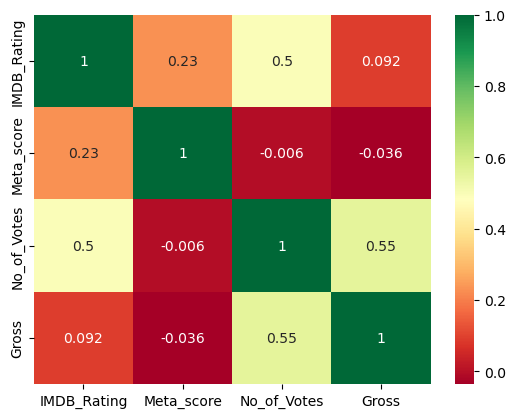

In [30]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn')

In [32]:
data[['IMDB_Rating', 'No_of_Votes']].groupby('No_of_Votes', as_index=False).mean().sort_values(by='IMDB_Rating',ascending=False)

,No_of_Votes,IMDB_Rating
995,2343110.0,9.3
986,1620367.0,9.2
967,1129952.0,9.0
892,689845.0,9.0
994,2303232.0,9.0
...,...,...
686,293266.0,7.6
688,294140.0,7.6
165,43374.0,7.6
699,311822.0,7.6


In [33]:
data['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [34]:
#Kaç tane film türü olduğuna bakıldı
genre_list = data['Genre'].str.split(', ')

unique_genres = set()
for genres in genre_list:
    unique_genres.update(genres)

unique_genres = sorted(list(unique_genres))

for genre in unique_genres:
    print(genre)

Action
Adventure
Animation
Biography
Comedy
Crime
Drama
Family
Fantasy
Film-Noir
History
Horror
Music
Musical
Mystery
Romance
Sci-Fi
Sport
Thriller
War
Western


In [35]:
#Veri setinde ki film türlerinin sayılarına bakılmıştır
import re
from collections import Counter


all_genre = ' '.join(data['Genre'].astype(str))
all_genre = all_genre.upper()


all_genre = re.sub(r'[^\w\s]', '', all_genre)


genre_counts = Counter(all_genre.split())


df_genre = pd.DataFrame.from_records(list(genre_counts.items()), columns=['Genre', 'Sayı'])


df_genre = df_genre.sort_values(by='Sayı', ascending=False)

df_genre


,Genre,Sayı
0,DRAMA,721
10,COMEDY,233
1,CRIME,208
3,ADVENTURE,196
2,ACTION,189
11,THRILLER,137
7,ROMANCE,125
4,BIOGRAPHY,109
15,MYSTERY,98
12,ANIMATION,81


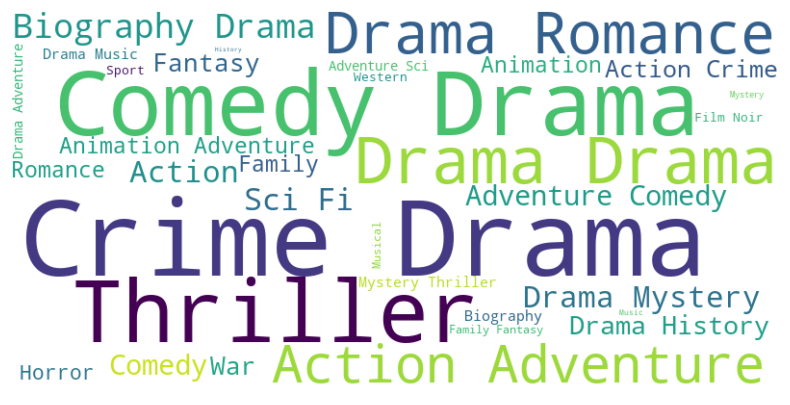

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tüm kelimeleri birleştir
all_genre = ' '.join(data['Genre'].astype(str))

# WordCloud objesini oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genre)

# Word cloud'u görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
drama_movies = data[data['Genre'].str.contains('Drama')]
imdb_ratings = drama_movies['IMDB_Rating']
average_rating = imdb_ratings.mean()
minimum_rating = imdb_ratings.min()
maximum_rating = imdb_ratings.max()
print("Average Rating:", average_rating)
print("Minimum Rating:", minimum_rating)
print("Maximum Rating:", maximum_rating)


Average Rating: 7.958529819694908
Minimum Rating: 7.6
Maximum Rating: 9.3


In [38]:
drama_movies = data[data['Genre'].str.contains('Comedy')]
imdb_ratings = drama_movies['IMDB_Rating']
average_rating = imdb_ratings.mean()
minimum_rating = imdb_ratings.min()
maximum_rating = imdb_ratings.max()
print("Average Rating:", average_rating)
print("Minimum Rating:", minimum_rating)
print("Maximum Rating:", maximum_rating)


Average Rating: 7.903433476394841
Minimum Rating: 7.6
Maximum Rating: 8.6


In [39]:
max_rating = data['IMDB_Rating'].max()
max_rating_movie = data[data['IMDB_Rating'] == max_rating]
genre_of_max_rating_movie = max_rating_movie['Genre'].iloc[0]
print("En yüksek rating değerine sahip film türü:", genre_of_max_rating_movie)


En yüksek rating değerine sahip film türü: Drama


In [40]:
max_gross = data['Gross'].max()
max_gross_movies = data[data['Gross'] == max_gross]
genre_of_max_gross_movies = max_gross_movies['Genre'].iloc[0]
print("En yüksek gişe hasılatına sahip film türü:", genre_of_max_gross_movies)

En yüksek gişe hasılatına sahip film türü: Action, Adventure, Sci-Fi


In [41]:
data['Gross'].max()

936662225.0

In [42]:
data[data['Gross']==936662225.0]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,G,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823.0,936662225.0


In [43]:
data[['IMDB_Rating', 'Genre']].groupby('Genre', as_index=False).mean().sort_values(by='IMDB_Rating',ascending=False)

,Genre,IMDB_Rating
80,"Animation, Drama, War",8.50
166,"Drama, Musical",8.40
34,"Action, Sci-Fi",8.40
171,"Drama, Mystery, War",8.35
201,Western,8.35
...,...,...
23,"Action, Crime, Mystery",7.60
5,"Action, Adventure, Family",7.60
9,"Action, Adventure, Mystery",7.60
3,"Action, Adventure, Crime",7.60


In [44]:
data[['Certificate', 'Gross']].groupby('Certificate', as_index=False).mean().sort_values(by='Gross',ascending=False)

,Certificate,Gross
5,UA,1.289347e+08
0,G,6.785211e+07
2,PG-13,3.602594e+07
4,R,2.543908e+07
1,PG,1.595715e+07
3,Passed,5.435554e+06
6,Unrated,3.000000e+05


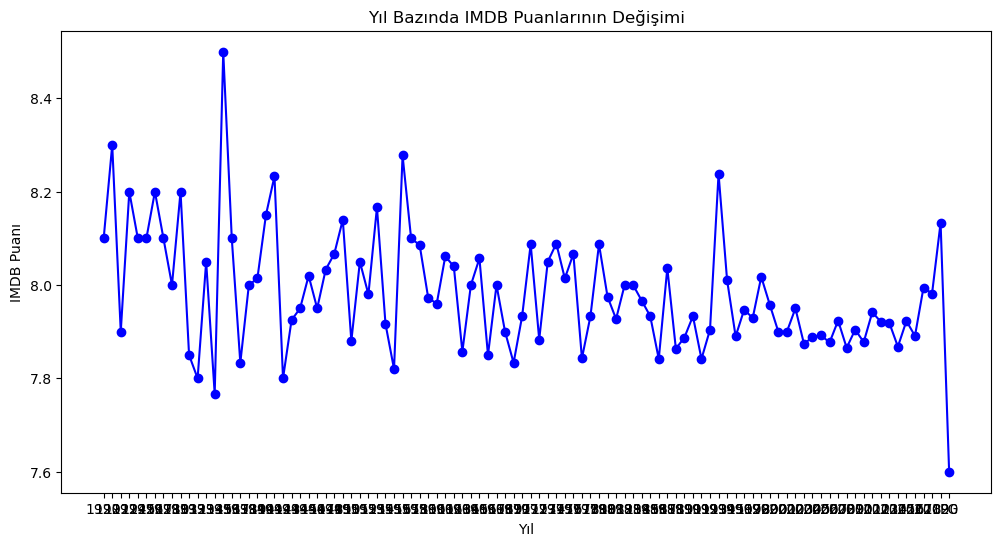

In [45]:
df_selected = data[['Released_Year', 'IMDB_Rating']]
mean_ratings = df_selected.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_ratings.index, mean_ratings.values, marker='o', linestyle='-', color='b')

step =1  
filtered_years = mean_ratings.index[::step]

plt.xticks(filtered_years)
plt.xlabel('Yıl')
plt.ylabel('IMDB Puanı')
plt.title('Yıl Bazında IMDB Puanlarının Değişimi')
plt.show()



In [46]:
data[['IMDB_Rating', 'Released_Year']].groupby('Released_Year', as_index=False).mean().sort_values(by='IMDB_Rating',ascending=False)

,Released_Year,IMDB_Rating
14,1936,8.500000
1,1921,8.300000
35,1957,8.277778
72,1994,8.238462
20,1942,8.233333
...,...,...
34,1956,7.820000
21,1943,7.800000
11,1933,7.800000
13,1935,7.766667


In [47]:
#Released_Year : Certficate türü olan 'PG' olamaz. Bu satır bize bilgi sağlayamayacağı için veri setinden temizlendi.
data[data['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,G,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197.0,173837933.0


In [48]:
data = data.drop(data[data['Released_Year'] == 'PG'].index)

In [49]:
data[['IMDB_Rating', 'Released_Year']].groupby('Released_Year', as_index=False).mean().sort_values(by='IMDB_Rating',ascending=False)

,Released_Year,IMDB_Rating
14,1936,8.500000
1,1921,8.300000
35,1957,8.277778
72,1994,8.238462
20,1942,8.233333
...,...,...
16,1938,7.833333
34,1956,7.820000
21,1943,7.800000
11,1933,7.800000


In [50]:
 data[data['IMDB_Rating'] >= 9]


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,G,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110.0,28341469.0
1,The Godfather,1972,G,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.0,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.0,534858444.0
3,The Godfather: Part II,1974,G,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952.0,57300000.0
4,12 Angry Men,1957,G,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.0,4360000.0


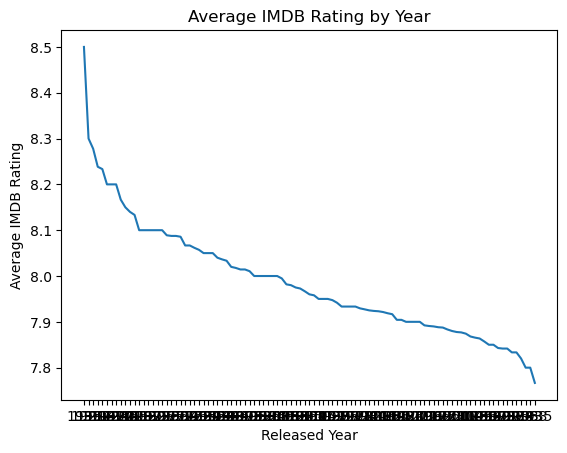

In [51]:
# Yıl bazında IMDB puanlarının ortalama değerlerini hesapla
grouped_data = data[['IMDB_Rating', 'Released_Year']].groupby('Released_Year', as_index=False).mean().sort_values(by='IMDB_Rating', ascending=False)

plt.plot(grouped_data['Released_Year'], grouped_data['IMDB_Rating'])
plt.xlabel('Released Year')
plt.ylabel('Average IMDB Rating')
plt.title('Average IMDB Rating by Year')
plt.show()


In [52]:
data.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)

Certificate
Unrated    8.050000
Passed     8.020000
G          7.980515
UA         7.947778
PG         7.921429
R          7.870470
PG-13      7.795455
Name: IMDB_Rating, dtype: float64

In [53]:
certificate_min_max = data.groupby('Certificate')['IMDB_Rating'].agg(['min', 'max'])
certificate_min_max


,min,max
Certificate,,
G,7.6,9.3
PG,7.6,8.6
PG-13,7.6,8.6
Passed,7.6,8.4
R,7.6,8.6
UA,7.6,9.0
Unrated,8.0,8.1


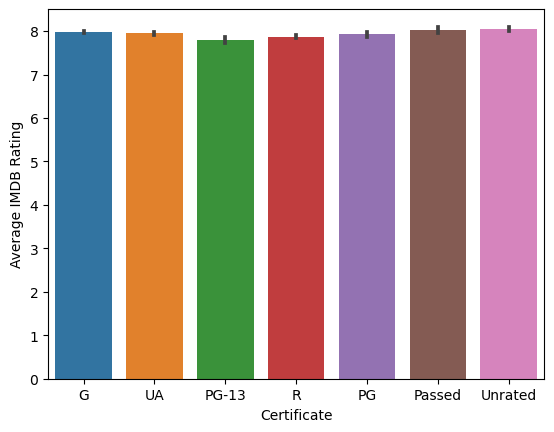

In [54]:
# IMDB puanı ve Certificate arasındaki ilişkiyi gösteren bar plot
sns.barplot(data=data, x='Certificate', y='IMDB_Rating')
plt.xlabel('Certificate')
plt.ylabel('Average IMDB Rating')
plt.show()


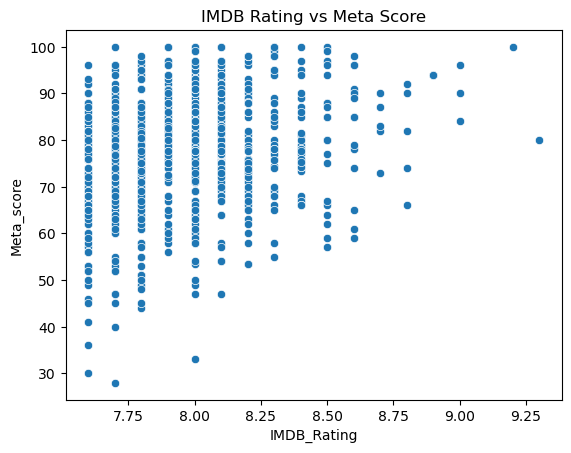

In [55]:
sns.scatterplot(data=data, x='IMDB_Rating', y='Meta_score')
plt.xlabel('IMDB_Rating')
plt.ylabel('Meta_score')
plt.title('IMDB Rating vs Meta Score')
plt.show()


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Count'>

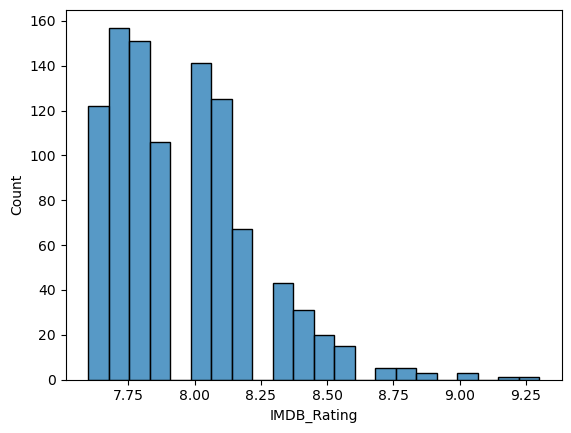

In [56]:
#Veri setindeki 'IMDB_Rating' değişkenin dağılımı histogram olarak görselleştirilmiştir.
sns.histplot(data=data, x='IMDB_Rating')

<AxesSubplot:xlabel='Meta_score', ylabel='Count'>

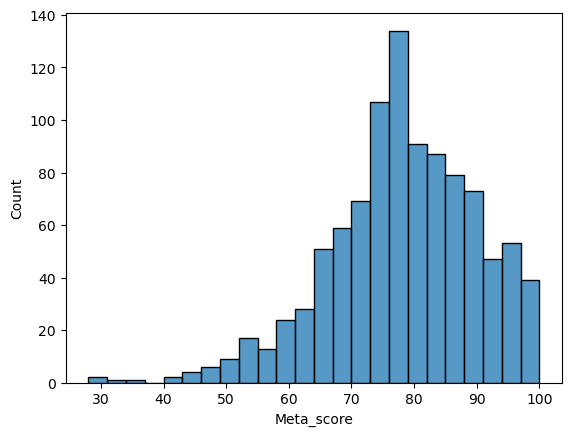

In [57]:
#Veri setindeki 'Meta_score' değişkenin dağılımı histogram olarak görselleştirilmiştir.
sns.histplot(data=data, x='Meta_score')

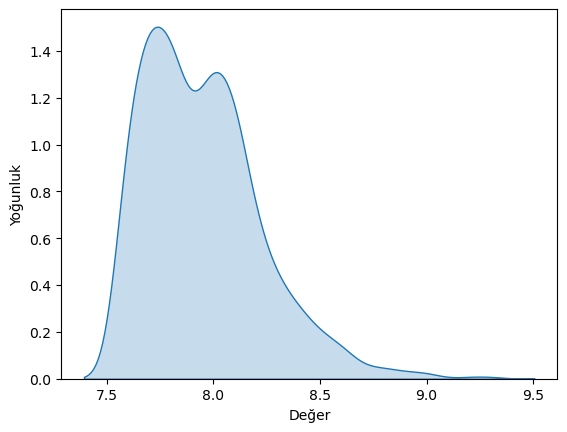

In [58]:
#Veri setindeki 'IMDB_Rating' değişkenin yoğunluk tahminini grafiğe dökmek "KDE" (Kernel Density Estimation) grafiği kullanılmıştır.
sns.kdeplot(data=data['IMDB_Rating'], shade=True)
plt.xlabel('Değer')
plt.ylabel('Yoğunluk')
plt.show()


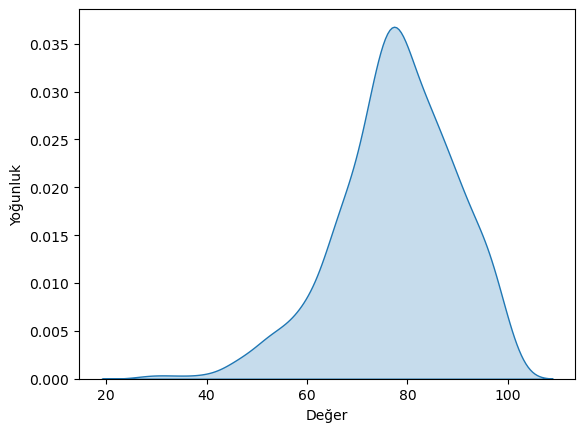

In [59]:
#Veri setindeki 'Meta_score' değişkenin yoğunluk tahminini grafiğe dökmek "KDE" (Kernel Density Estimation) grafiği kullanılmıştır.
sns.kdeplot(data=data['Meta_score'], shade=True)
plt.xlabel('Değer')
plt.ylabel('Yoğunluk')
plt.show()

In [60]:
#Her bir yönetmenin çektiği film sayısına bakılmıştır
director_film_counts = data['Director'].value_counts().reset_index()
director_film_counts.columns = ['Director', 'Movie Counts']
director_film_counts

,Director,Movie Counts
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
...,...,...
541,Neill Blomkamp,1
542,Tomas Alfredson,1
543,Duncan Jones,1
544,Jacques Audiard,1


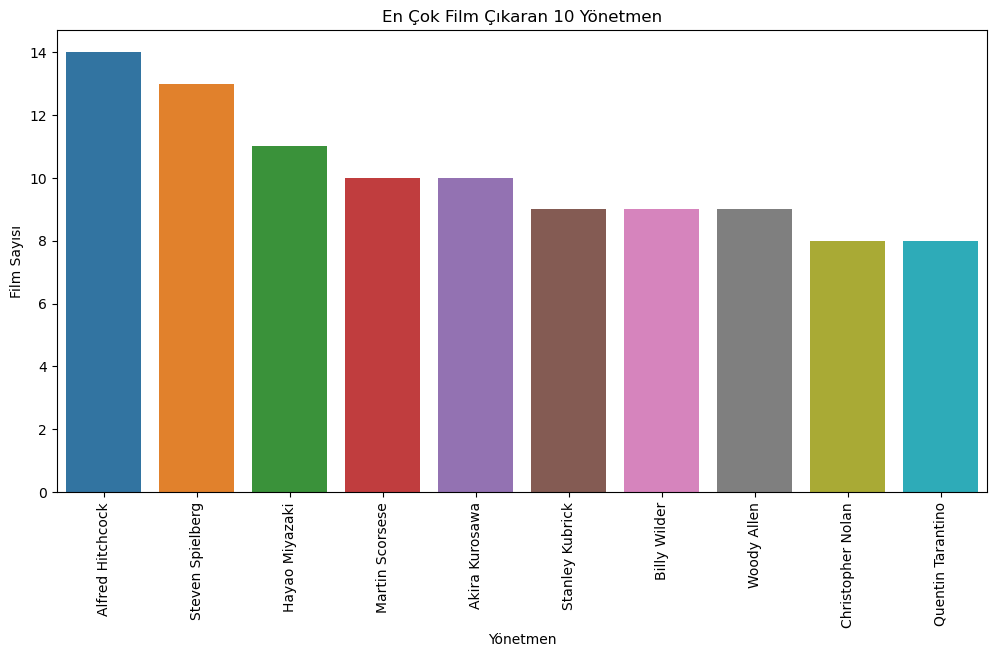

In [77]:
#En çok film çıkaran 10 yönetmen ve film sayıları görselleştirilmiştir
director_counts = data['Director'].value_counts()
top_directors = director_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=90) 
plt.xlabel('Yönetmen')
plt.ylabel('Film Sayısı')
plt.title('En Çok Film Çıkaran 10 Yönetmen')
plt.show()


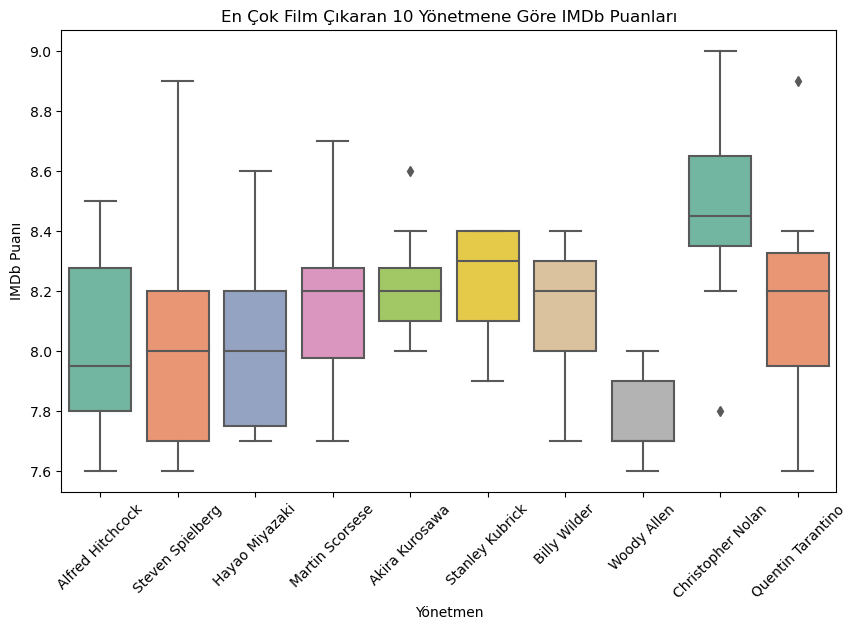

In [62]:
#En çok film çıkaran 10 yönetmene göre IMDB Puanları

top_directors = data['Director'].value_counts().head(10).index
top_directors_ratings = data[data['Director'].isin(top_directors)]['IMDB_Rating']
plt.figure(figsize=(10, 6))  
sns.boxplot(x=data['Director'], y=data['IMDB_Rating'], order=top_directors, palette='Set2')
plt.xticks(rotation=45) 
plt.xlabel('Yönetmen')
plt.ylabel('IMDb Puanı')
plt.title('En Çok Film Çıkaran 10 Yönetmene Göre IMDb Puanları')
plt.show()


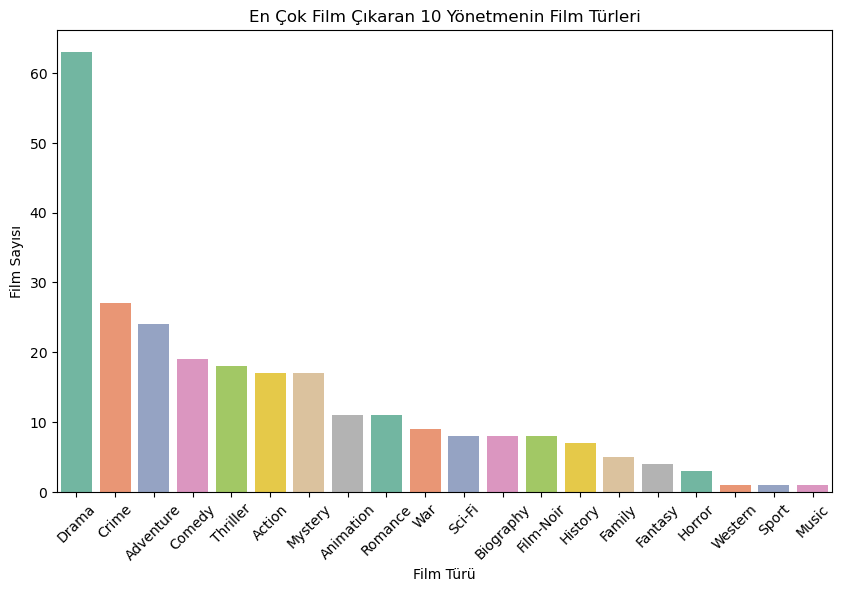

In [64]:
#En çok film çıkaran 10 yönetmenin film türleri

top_directors = data['Director'].value_counts().head(10).index
top_directors_movies = data[data['Director'].isin(top_directors)]
genre_counts = top_directors_movies['Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6)) 
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Film Türü')
plt.ylabel('Film Sayısı')
plt.title('En Çok Film Çıkaran 10 Yönetmenin Film Türleri')
plt.show()


In [65]:
#En çok Drama türünde film çekilmiştir. Bu filmlerde oynayan oyunculara bakılmıştır

drama_movies = data[data['Genre'].str.contains('Drama')]
actors = pd.concat([drama_movies['Star1'], drama_movies['Star2'], drama_movies['Star3'], drama_movies['Star4']])
top_actors = actors.value_counts().head(15)
top_actors


Robert De Niro       17
Al Pacino            13
Leonardo DiCaprio     9
Christian Bale        9
Ethan Hawke           9
Brad Pitt             9
Denzel Washington     9
Johnny Depp           8
Tom Hanks             8
Morgan Freeman        7
Jake Gyllenhaal       7
James Stewart         7
Russell Crowe         7
Aamir Khan            7
Sean Penn             6
dtype: int64

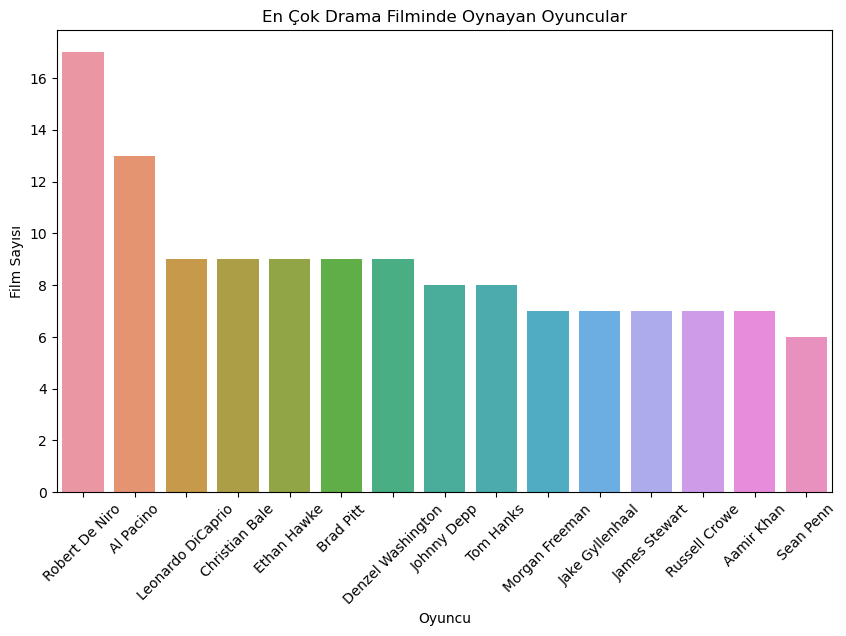

In [66]:
drama_movies = data[data['Genre'].str.contains('Drama')]
actors = pd.concat([drama_movies['Star1'], drama_movies['Star2'], drama_movies['Star3'], drama_movies['Star4']])
top_actors = actors.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xlabel('Oyuncu')
plt.ylabel('Film Sayısı')
plt.title('En Çok Drama Filminde Oynayan Oyuncular')
plt.xticks(rotation=45)
plt.show()


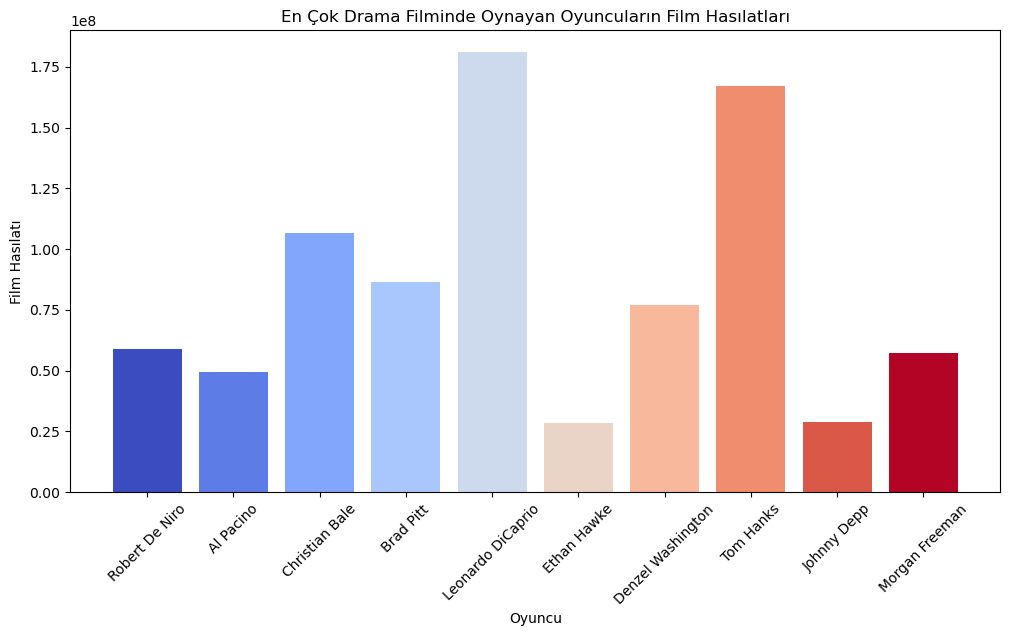

In [70]:
#Drama film türünde en çok oynayan oyuncuların oynadıkları filmlere göre hasılatlarına bakılmıştır

drama_movies = data[data['Genre'].str.contains('Drama')]
actors = pd.concat([drama_movies['Star1'], drama_movies['Star2'], drama_movies['Star3'], drama_movies['Star4']])

# Her oyuncu için film hasılatlarının ve film sayılarının hesaplanması
actor_stats = {}
for actor in actors.unique():
    actor_movies = drama_movies[(drama_movies['Star1'] == actor) | (drama_movies['Star2'] == actor) | (drama_movies['Star3'] == actor) | (drama_movies['Star4'] == actor)]
    total_revenue = actor_movies['Gross'].mean()
    movie_count = len(actor_movies)
    actor_stats[actor] = {'Total Revenue': total_revenue, 'Movie Count': movie_count}


actor_stats_df = pd.DataFrame.from_dict(actor_stats, orient='index')
actor_stats_df.index.name = 'Actor'
actor_stats_df = actor_stats_df.reset_index()


top_actors = actor_stats_df.nlargest(10, 'Movie Count')

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, 10))
plt.figure(figsize=(12, 6))
plt.bar(top_actors['Actor'], top_actors['Total Revenue'],color=colors)
plt.xlabel('Oyuncu')
plt.ylabel('Film Hasılatı')
plt.title('En Çok Drama Filminde Oynayan Oyuncuların Film Hasılatları')
plt.xticks(rotation=45)
plt.show()

In [72]:
top_actors[['Actor', 'Movie Count', 'Total Revenue']]

,Actor,Movie Count,Total Revenue
10,Robert De Niro,17,5.892154e+07
3,Al Pacino,13,4.932403e+07
2,Christian Bale,9,1.068275e+08
8,Brad Pitt,9,8.659399e+07
26,Leonardo DiCaprio,9,1.809676e+08
144,Ethan Hawke,9,2.852488e+07
342,Denzel Washington,9,7.687442e+07
9,Tom Hanks,8,1.669919e+08
293,Johnny Depp,8,2.871491e+07
18,Morgan Freeman,7,5.710592e+07


In [73]:
#Veri setinde 'Star1','Star2','Star3','Star4' olmak üzere 4 tane ayrı sütunlarda bulunan oyuncular mevcut
#Bu oyuncuların oynadıkları film sayısı, filmlerinin IMDB ortalamaları ve film türlerine bakılmıştır.

In [74]:
data['Star1'].value_counts()

Tom Hanks            11
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
                     ..
Tae-Hyun Cha          1
Alan Mak              1
Preity Zinta          1
Javier Bardem         1
Robert Donat          1
Name: Star1, Length: 657, dtype: int64

In [75]:
top_10_star1 = data['Star1'].value_counts().head(10)
film_counts = {}
imdb_ratings = {}

for star1 in top_10_star1.index:
    film_count = top_10_star1[star1]
    film_counts[star1] = film_count
    imdb_avg = data[data['Star1'] == star1]['IMDB_Rating'].mean()
    imdb_ratings[star1] = imdb_avg

film_counts = pd.Series(film_counts)
imdb_ratings = pd.Series(imdb_ratings)

result = pd.concat([film_counts, imdb_ratings], axis=1)
result.columns = ['Film Sayısı', 'IMDb Ortalaması']

result


,Film Sayısı,IMDb Ortalaması
Tom Hanks,11,8.081818
Robert De Niro,11,8.072727
Al Pacino,10,8.010000
Clint Eastwood,10,7.970000
Leonardo DiCaprio,9,8.133333
Humphrey Bogart,9,7.955556
Johnny Depp,8,7.737500
James Stewart,8,8.175000
Christian Bale,8,8.112500
Toshirô Mifune,7,8.242857


In [76]:
top_10_actors = data['Star1'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star1'].isin(top_10_actors)][['Star1', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star1', 'Certificate']).size().unstack().fillna(0)

actor_certificate_counts


Certificate,G,PG,Passed,R,UA
Star1,,,,,
Al Pacino,8.0,0.0,0.0,1.0,1.0
Christian Bale,4.0,0.0,0.0,1.0,3.0
Clint Eastwood,8.0,1.0,0.0,1.0,0.0
Humphrey Bogart,4.0,2.0,3.0,0.0,0.0
James Stewart,6.0,1.0,1.0,0.0,0.0
Johnny Depp,4.0,0.0,0.0,3.0,1.0
Leonardo DiCaprio,7.0,0.0,0.0,0.0,2.0
Robert De Niro,8.0,0.0,0.0,2.0,1.0
Tom Hanks,5.0,0.0,0.0,1.0,5.0


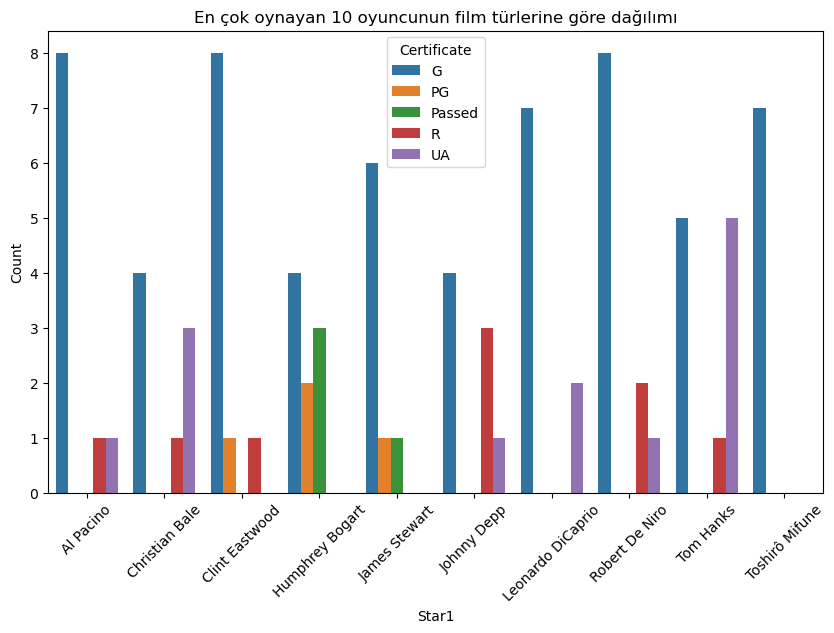

In [78]:

top_10_actors = data['Star1'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star1'].isin(top_10_actors)][['Star1', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star1', 'Certificate']).size().unstack().fillna(0)
actor_certificate_counts = actor_certificate_counts.reset_index()
melted_data = actor_certificate_counts.melt(id_vars='Star1', var_name='Certificate', value_name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Star1', y='Count', hue='Certificate')
plt.xlabel('Star1')
plt.ylabel('Count')
plt.title('En çok oynayan 10 oyuncunun film türlerine göre dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Certificate')
plt.show()


In [101]:
data['Star2'].value_counts()

Emma Watson          7
Matt Damon           5
Kate Winslet         4
Ian McKellen         4
Meryl Streep         4
                    ..
Shahab Hosseini      1
Simon Yam            1
Mete Horozoglu       1
Dev Patel            1
Madeleine Carroll    1
Name: Star2, Length: 837, dtype: int64

In [95]:
top_10_star1 = data['Star2'].value_counts().head(10)
film_counts = {}
imdb_ratings = {}

for star1 in top_10_star1.index:
    film_count = top_10_star1[star1]
    film_counts[star1] = film_count
    imdb_avg = data[data['Star2'] == star1]['IMDB_Rating'].mean()
    imdb_ratings[star1] = imdb_avg

film_counts = pd.Series(film_counts)
imdb_ratings = pd.Series(imdb_ratings)

result = pd.concat([film_counts, imdb_ratings], axis=1)
result.columns = ['Film Sayısı', 'IMDb Ortalaması']

result

,Film Sayısı,IMDb Ortalaması
Emma Watson,7,7.828571
Matt Damon,5,8.200000
Kate Winslet,4,7.825000
Ian McKellen,4,8.300000
Meryl Streep,4,7.750000
Julie Delpy,4,7.925000
Chris Evans,4,7.850000
Ed Harris,4,7.875000
Brad Pitt,4,8.050000
Diane Keaton,4,7.800000


In [96]:
top_10_actors = data['Star2'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star2'].isin(top_10_actors)][['Star2', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star2', 'Certificate']).size().unstack().fillna(0)

actor_certificate_counts


Certificate,G,PG,R,UA
Star2,,,,
Brad Pitt,2.0,0.0,0.0,2.0
Chris Evans,0.0,0.0,0.0,4.0
Diane Keaton,2.0,1.0,1.0,0.0
Ed Harris,2.0,0.0,1.0,1.0
Emma Watson,3.0,0.0,0.0,4.0
Ian McKellen,1.0,0.0,0.0,3.0
Julie Delpy,1.0,0.0,3.0,0.0
Kate Winslet,2.0,0.0,0.0,2.0
Matt Damon,3.0,0.0,1.0,1.0


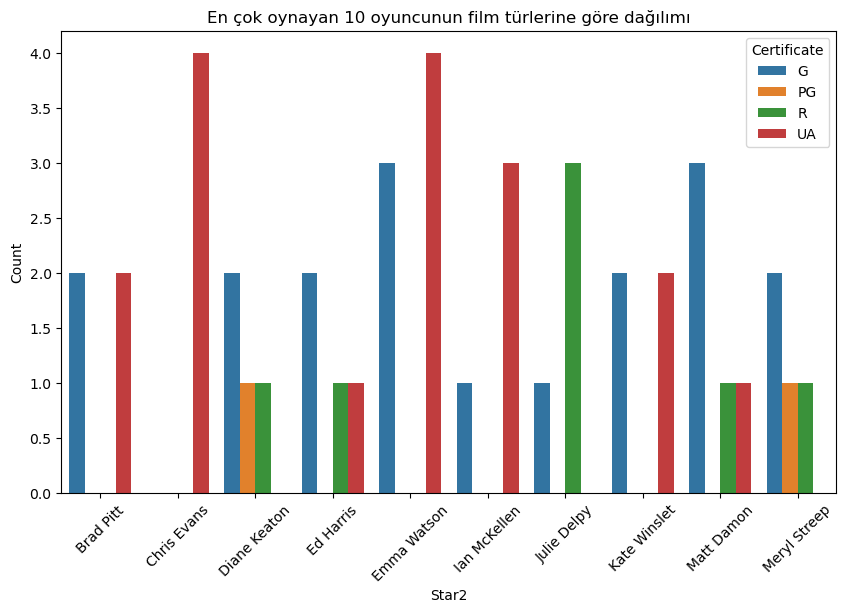

In [79]:
top_10_actors = data['Star2'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star2'].isin(top_10_actors)][['Star2', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star2', 'Certificate']).size().unstack().fillna(0)
actor_certificate_counts = actor_certificate_counts.reset_index()
melted_data = actor_certificate_counts.melt(id_vars='Star2', var_name='Certificate', value_name='Count')
melted_data['Count'] = melted_data['Count'].astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Star2', y='Count', hue='Certificate')
plt.xlabel('Star2')
plt.ylabel('Count')
plt.title('En çok oynayan 10 oyuncunun film türlerine göre dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Certificate')
plt.show()


In [104]:
data['Star3'].value_counts()

Rupert Grint          5
Jennifer Connelly     4
Rachel McAdams        4
Scarlett Johansson    4
Samuel L. Jackson     4
                     ..
Bradley Cooper        1
Gwilym Lee            1
Will Poulter          1
Ezra Miller           1
Lucie Mannheim        1
Name: Star3, Length: 888, dtype: int64

In [97]:
top_10_star1 = data['Star3'].value_counts().head(10)
film_counts = {}
imdb_ratings = {}

for star1 in top_10_star1.index:
    film_count = top_10_star1[star1]
    film_counts[star1] = film_count
    imdb_avg = data[data['Star3'] == star1]['IMDB_Rating'].mean()
    imdb_ratings[star1] = imdb_avg

film_counts = pd.Series(film_counts)
imdb_ratings = pd.Series(imdb_ratings)

result = pd.concat([film_counts, imdb_ratings], axis=1)
result.columns = ['Film Sayısı', 'IMDb Ortalaması']

result

,Film Sayısı,IMDb Ortalaması
Rupert Grint,5,7.800
Jennifer Connelly,4,8.025
Rachel McAdams,4,7.800
Scarlett Johansson,4,8.100
Samuel L. Jackson,4,7.975
Carrie Fisher,4,8.300
John Goodman,4,7.850
Joe Pesci,4,8.250
Nawazuddin Siddiqui,3,8.000
Christopher Plummer,3,7.800


In [98]:
top_10_actors = data['Star3'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star3'].isin(top_10_actors)][['Star3', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star3', 'Certificate']).size().unstack().fillna(0)

actor_certificate_counts

Certificate,G,PG,PG-13,R,UA
Star3,,,,,
Carrie Fisher,1.0,0.0,0.0,0.0,3.0
Christopher Plummer,0.0,1.0,0.0,1.0,1.0
Jennifer Connelly,3.0,0.0,0.0,0.0,1.0
Joe Pesci,3.0,0.0,0.0,1.0,0.0
John Goodman,3.0,0.0,0.0,1.0,0.0
Nawazuddin Siddiqui,2.0,0.0,0.0,0.0,1.0
Rachel McAdams,2.0,1.0,1.0,0.0,0.0
Rupert Grint,2.0,0.0,0.0,0.0,3.0
Samuel L. Jackson,3.0,0.0,0.0,0.0,1.0


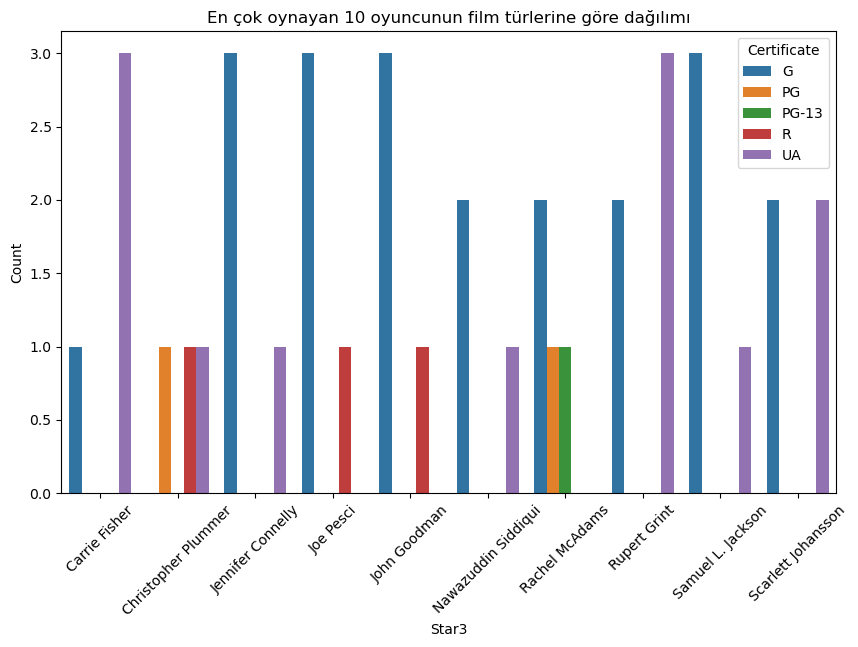

In [80]:
top_10_actors = data['Star3'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star3'].isin(top_10_actors)][['Star3', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star3', 'Certificate']).size().unstack().fillna(0)
actor_certificate_counts = actor_certificate_counts.reset_index()
melted_data = actor_certificate_counts.melt(id_vars='Star3', var_name='Certificate', value_name='Count')
melted_data['Count'] = melted_data['Count'].astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Star3', y='Count', hue='Certificate')
plt.xlabel('Star3')
plt.ylabel('Count')
plt.title('En çok oynayan 10 oyuncunun film türlerine göre dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Certificate')
plt.show()

In [91]:
data['Star4'].value_counts()

Michael Caine            4
Mark Ruffalo             3
Catherine Keener         3
Paprika Steen            2
Liev Schreiber           2
                        ..
Ed Skrein                1
Merila Zare'i            1
Dibyendu Bhattacharya    1
Ka Tung Lam              1
Godfrey Tearle           1
Name: Star4, Length: 935, dtype: int64

In [92]:
top_10_star1 = data['Star4'].value_counts().head(15)
film_counts = {}
imdb_ratings = {}

for star1 in top_10_star1.index:
    film_count = top_10_star1[star1]
    film_counts[star1] = film_count
    imdb_avg = data[data['Star4'] == star1]['IMDB_Rating'].mean()
    imdb_ratings[star1] = imdb_avg

film_counts = pd.Series(film_counts)
imdb_ratings = pd.Series(imdb_ratings)

result = pd.concat([film_counts, imdb_ratings], axis=1)
result.columns = ['Film Sayısı', 'IMDb Ortalaması']

result

,Film Sayısı,IMDb Ortalaması
Michael Caine,4,8.275000
Mark Ruffalo,3,8.233333
Catherine Keener,3,7.700000
Paprika Steen,2,7.900000
Liev Schreiber,2,7.850000
Joseph Calleia,2,7.850000
Jack Carson,2,8.000000
Yukito Nishii,2,7.950000
Frederic Forrest,2,8.100000
Brad Pitt,2,7.950000


In [93]:
top_10_actors = data['Star4'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star4'].isin(top_10_actors)][['Star4', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star4', 'Certificate']).size().unstack().fillna(0)

actor_certificate_counts

Certificate,G,PG-13,R,UA
Star4,,,,
Brad Pitt,2.0,0.0,0.0,0.0
Catherine Keener,0.0,0.0,2.0,1.0
Frederic Forrest,1.0,0.0,1.0,0.0
Jack Carson,2.0,0.0,0.0,0.0
Joseph Calleia,1.0,1.0,0.0,0.0
Liev Schreiber,1.0,0.0,1.0,0.0
Mark Ruffalo,0.0,0.0,0.0,3.0
Michael Caine,3.0,0.0,0.0,1.0
Paprika Steen,0.0,0.0,2.0,0.0


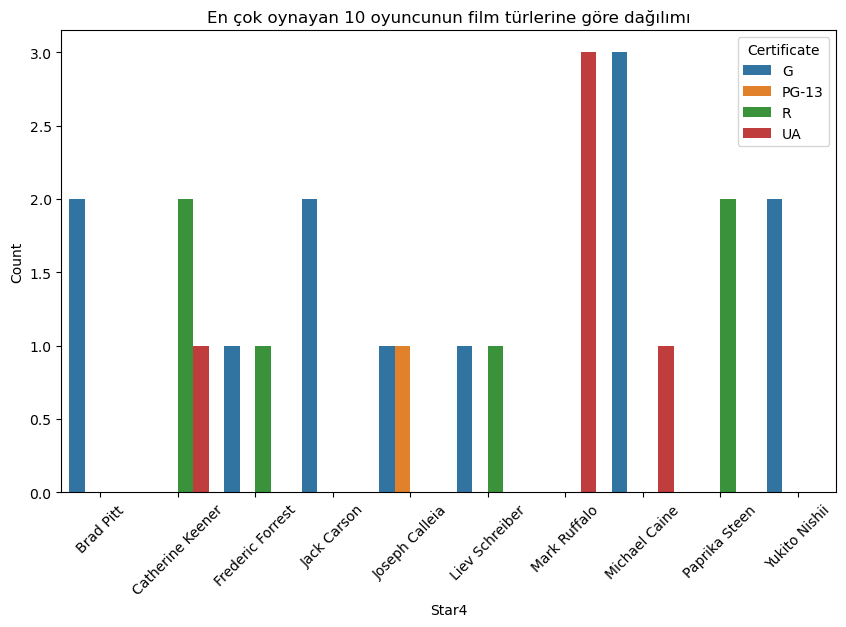

In [81]:
top_10_actors = data['Star4'].value_counts().head(10).index.tolist()
actor_certificates = data[data['Star4'].isin(top_10_actors)][['Star4', 'Certificate']]
actor_certificate_counts = actor_certificates.groupby(['Star4', 'Certificate']).size().unstack().fillna(0)
actor_certificate_counts = actor_certificate_counts.reset_index()
melted_data = actor_certificate_counts.melt(id_vars='Star4', var_name='Certificate', value_name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Star4', y='Count', hue='Certificate')
plt.xlabel('Star4')
plt.ylabel('Count')
plt.title('En çok oynayan 10 oyuncunun film türlerine göre dağılımı')
plt.xticks(rotation=45)
plt.legend(title='Certificate')
plt.show()

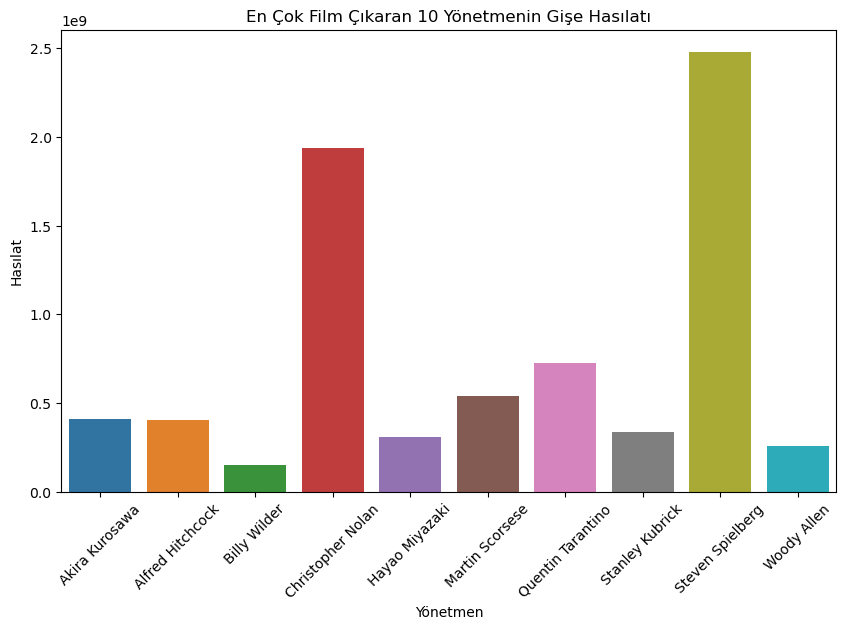

In [82]:
#En çok film çıkaran 10 yönetmenin film hasılatlarına bakılmıştır

top_directors = data['Director'].value_counts().head(10).index.tolist()
director_gross = data[data['Director'].isin(top_directors)][['Director', 'Gross']]
director_gross = director_gross.groupby('Director')['Gross'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=director_gross, x='Director', y='Gross')
plt.xlabel('Yönetmen')
plt.ylabel('Hasılat')
plt.title('En Çok Film Çıkaran 10 Yönetmenin Gişe Hasılatı')
plt.xticks(rotation=45)
plt.show()


In [111]:
data[data['Director'] == 'Steven Spielberg']


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
7,Schindler's List,1993,G,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505.0,96898818.0
24,Saving Private Ryan,1998,R,169 min,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804.0,216540909.0
72,Raiders of the Lost Ark,1981,G,115 min,"Action, Adventure",8.4,"In 1936, archaeologist and adventurer Indiana ...",85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112.0,248159971.0
168,Indiana Jones and the Last Crusade,1989,G,127 min,"Action, Adventure",8.2,"In 1938, after his father Professor Henry Jone...",65.0,Steven Spielberg,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,692366.0,197171806.0
243,Catch Me If You Can,2002,G,141 min,"Biography, Crime, Drama",8.1,"Barely 21 yet, Frank is a skilled forger who h...",75.0,Steven Spielberg,Leonardo DiCaprio,Tom Hanks,Christopher Walken,Martin Sheen,832846.0,164615351.0
262,Jurassic Park,1993,UA,127 min,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,68.0,Steven Spielberg,Sam Neill,Laura Dern,Jeff Goldblum,Richard Attenborough,867615.0,402453882.0
415,Jaws,1975,G,124 min,"Adventure, Thriller",8.0,When a killer shark unleashes chaos on a beach...,87.0,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,543388.0,260000000.0
682,The Color Purple,1985,G,154 min,Drama,7.8,A black Southern woman struggles to find her i...,78.0,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321.0,98467863.0
688,E.T. the Extra-Terrestrial,1982,G,115 min,"Family, Sci-Fi",7.8,A troubled child summons the courage to help a...,91.0,Steven Spielberg,Henry Thomas,Drew Barrymore,Peter Coyote,Dee Wallace,372490.0,435110554.0
832,Empire of the Sun,1987,G,153 min,"Action, Drama, History",7.7,A young English boy struggles to survive under...,62.0,Steven Spielberg,Christian Bale,John Malkovich,Miranda Richardson,Nigel Havers,115677.0,22238696.0


In [99]:
movies_by_director = data[data['Director'] == 'Steven Spielberg']
actors = pd.concat([movies_by_director['Star1'], movies_by_director['Star2'], movies_by_director['Star3'], movies_by_director['Star4']])
top_actor = actors.value_counts().idxmax()
top_actor

'Tom Hanks'

C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\numan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.5% of the points

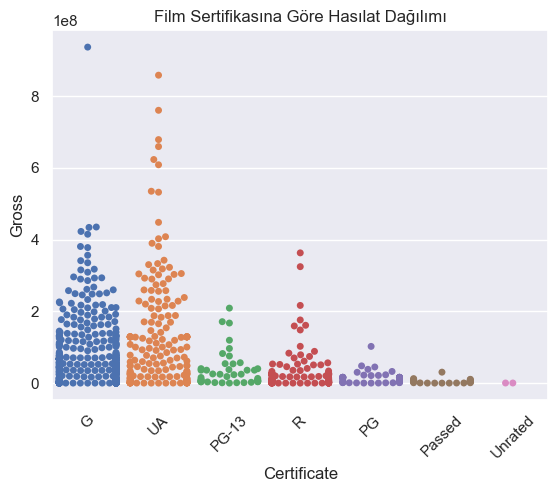

In [114]:
#Film türüne göre hasılat dağılımı
sns.set(style='darkgrid')
sns.swarmplot(data=data, x='Certificate', y='Gross')
plt.xlabel('Certificate')
plt.ylabel('Gross')
plt.title('Film Sertifikasına Göre Hasılat Dağılımı')
plt.xticks(rotation=45)
plt.show()

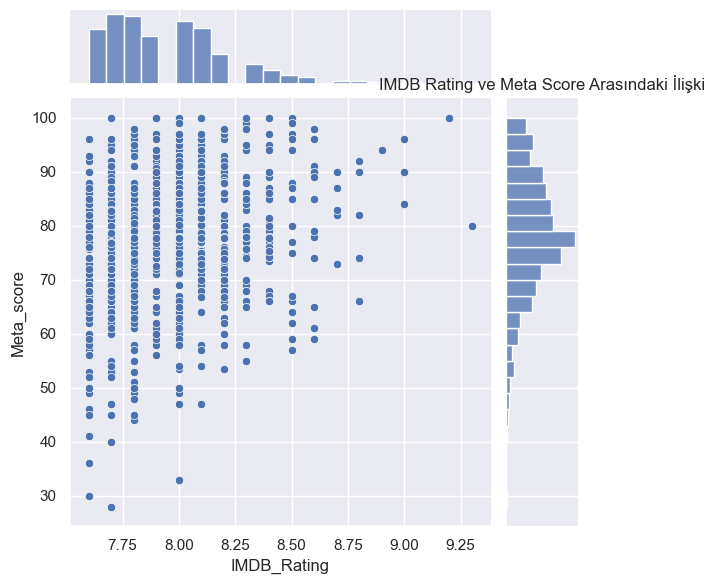

In [242]:
sns.set(style='darkgrid')
sns.jointplot(data=data, x='IMDB_Rating', y='Meta_score', kind='scatter')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating ve Meta Score Arasındaki İlişki')
plt.show()


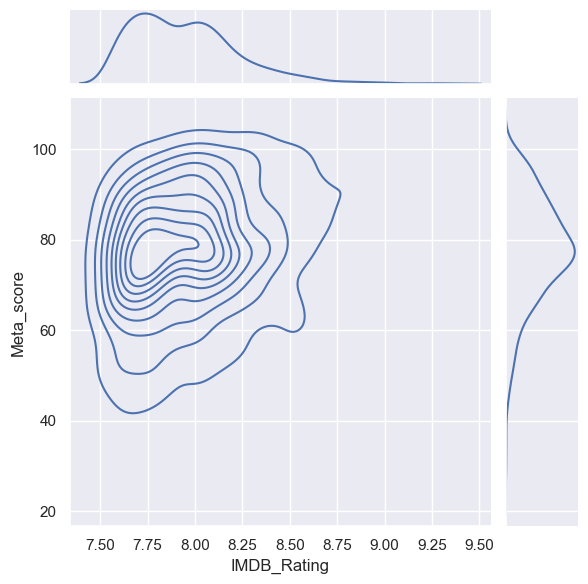

In [115]:
sns.jointplot(data=data, x='IMDB_Rating', y='Meta_score', kind='kde')

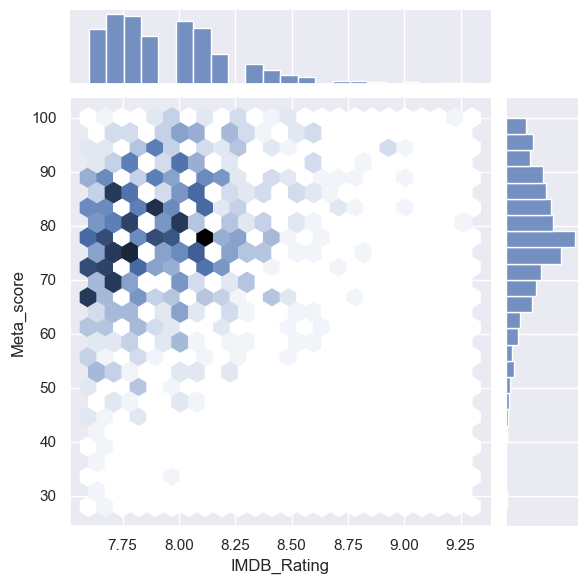

In [116]:
sns.jointplot(data=data, x='IMDB_Rating', y='Meta_score', kind='hex')

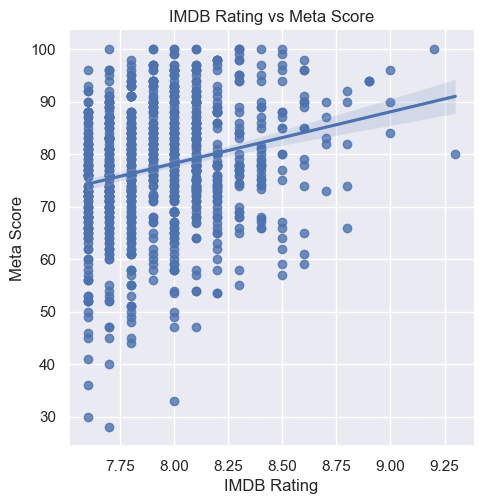

In [117]:
sns.lmplot(data=data, x='IMDB_Rating', y='Meta_score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating vs Meta Score')
plt.show()


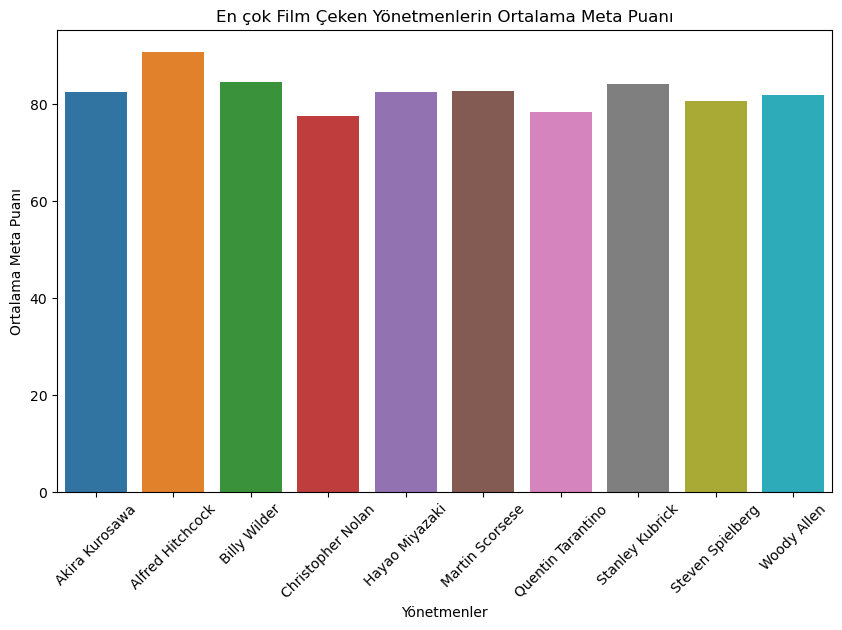

In [84]:
top_directors = data['Director'].value_counts().head(10).index.tolist()
director_data = data[data['Director'].isin(top_directors)]
director_meta_scores = director_data[['Director', 'Meta_score']]
director_avg_meta_scores = director_meta_scores.groupby('Director')['Meta_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=director_avg_meta_scores, x='Director', y='Meta_score')
plt.xlabel('Yönetmenler')
plt.ylabel('Ortalama Meta Puanı')
plt.title('En çok Film Çeken Yönetmenlerin Ortalama Meta Puanı')
plt.xticks(rotation=45)
plt.show()


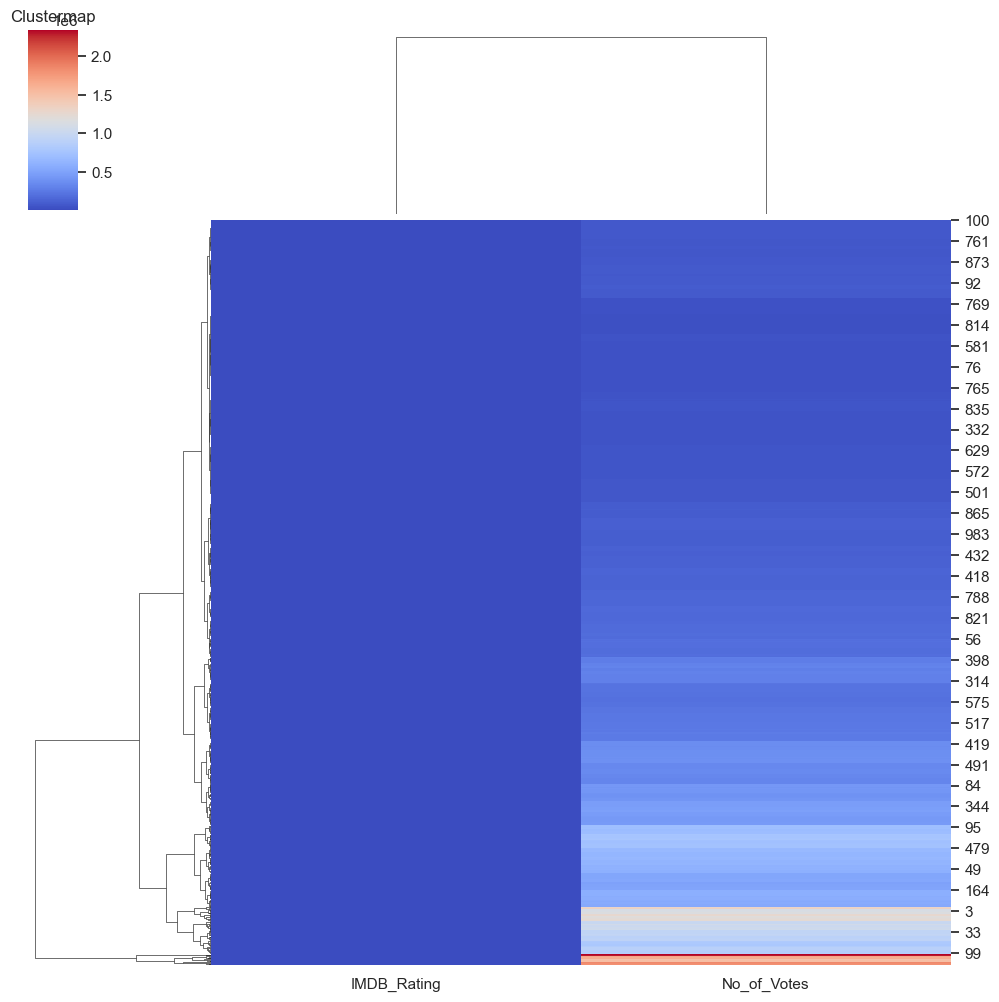

In [254]:
clustered_data = data[['IMDB_Rating', 'No_of_Votes']]
clustermap = sns.clustermap(clustered_data, cmap='coolwarm')
plt.title('Clustermap')
plt.show()

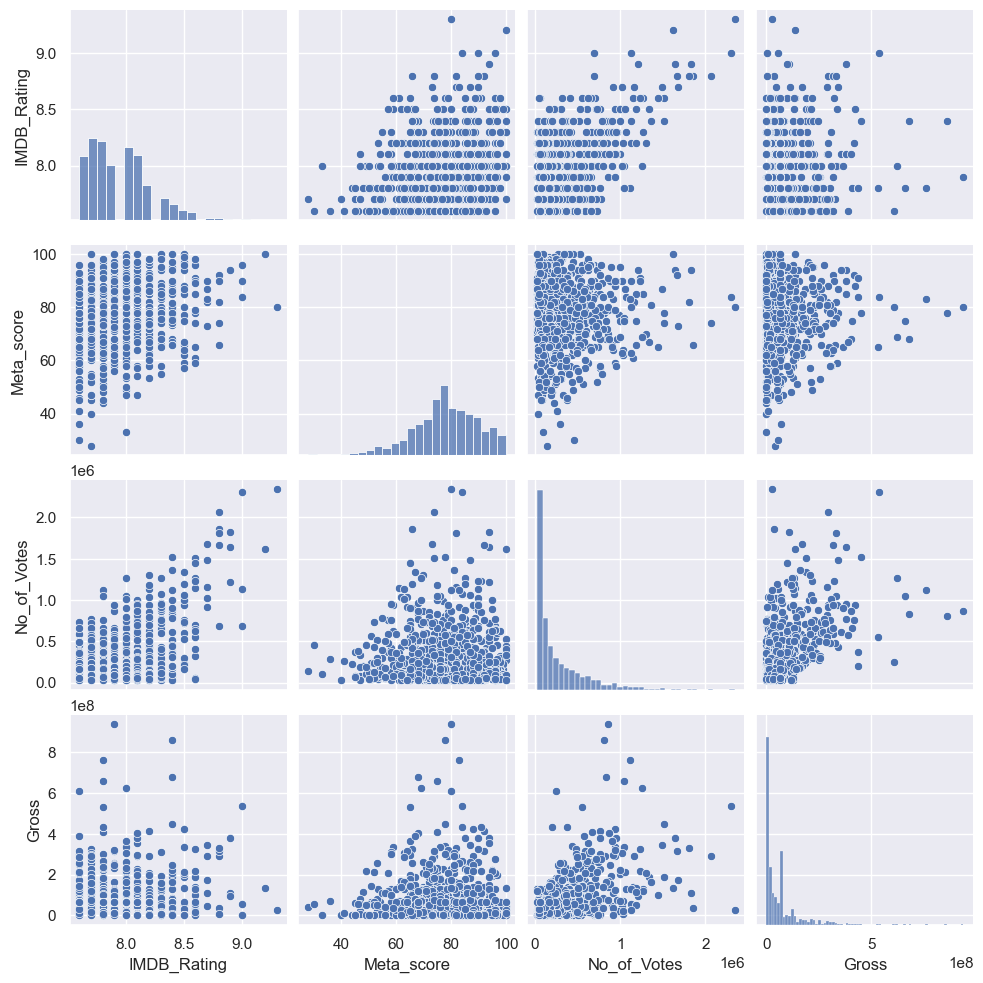

In [119]:
sns.pairplot(data)

In [121]:
certificate_votes = data.groupby('Certificate')['No_of_Votes'].mean()
certificate_votes.sort_values()

Certificate
Unrated     56103.000000
Passed      72186.000000
PG          94104.309524
PG-13      142578.545455
R          209943.979866
G          279009.634191
UA         429295.044444
Name: No_of_Votes, dtype: float64

Datasetinde NaN değerler doldurulurak veri setinde eksik değer bırakılmamıştır

IMDB Puanlarına göre gruplandırma işlemleri yapıldığında genellikle 'G' genel izleyiciye uygun filmler IMDB Puanları yüksek filmlerdir.

Gross ve IMDB Puanları arasında güçlü bir ilişki bulunmamaktadır. En yüksek puana sahip filmler en çok gişe hasılatına sahip değildir.

IMDB Puanlarında 'Certificate' yani film türleri etkilidir.

Film türlerinde en çok 'Drama' türü kullanılmıştır.

En çok IMDB Puanına sahip film türü Drama film türüdür.

En yüksek gişe hasılatına sahip film türü: Action, Adventure, Sci-Fi

Filmin yılı ile de IMDB arasında ki ilişki tablolaştırılmıştır

En çok film yapan yönetmenlerin IMDB Puanlarına bakılmıştır. En fazla film yapan yönetmen en fazla IMDB Puanını almamıştır. Aralarında güçlü bir ilişki yoktur.

En çok film yapan yönetmenler 'Drama' türünde filmlerini yapmıştır.

En çok film yapan yönetmenlerde gişe hasılatı yüksek olan yönetmenin filmlerinde en çok oynayan oyuncu gözlemlenmiştir.

Bu verisetinde IMDB Puanına etki eden faktörler ele alınmıştır. Veri setinde yer alan bilgiler birbirleriyle ilişkilendirilerek sonuçlar çıkartılmaya çalışılmıştır. 

Sonuç alarak film türleri IMDB Puanında etkildir. Gişe hasılatı IMDB Puanında etkisi zayıftır.
En çok film türü 'Drama' türünde yapılmıştır. Yani sonrası için bir yorumda bulunulacak olursak 'Drama' türünde yapılan filmlerin izlenme oranları yüksek olacaktır diyebiliriz.

Yönetmenlerin ve Oyuncuların da IMDB Puanına etkisi olduğu gözlemlenmiştir.

IMDB Puanı, No_of_Votes ile ilişkilendirilir. Çünkü alınan oy sayısını gösterir
